# Matrix Approximation

This example loads and shows 25 random MNIST images. Then, asks the user to input rank of matrix approximation.
Using SVD Low-Rank Approximation, the 25 images are reconstructed.

2022-10-04 15:26:55.928545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/rowel/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 1s 0us/step


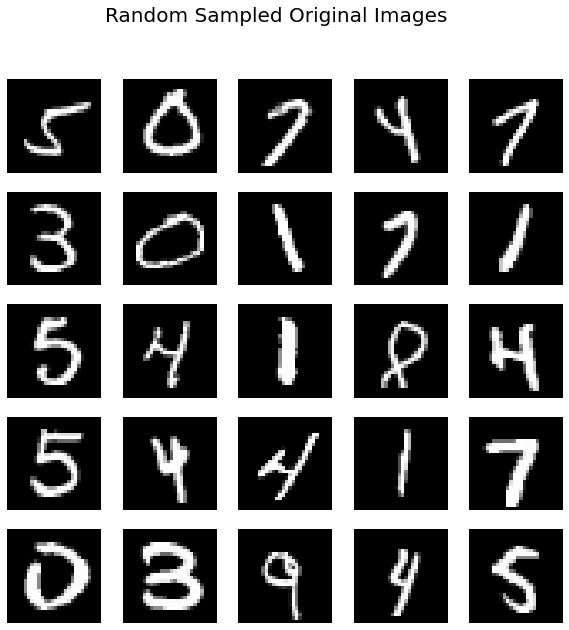

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import math

# load dataset using tf.keras utils
(x_train, _), (_, _) = mnist.load_data()

# sample 25 mnist digits from train dataset
n_images = 25
indexes = np.random.randint(0, x_train.shape[0], size=n_images)
images = x_train[indexes]

#util function for displaying images in a grid
def plot_images(images, title, n_images=25):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    side = int(math.sqrt(n_images))
    for i in range(len(indexes)):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close('all')
    
title = "Random Sampled Original Images"
plot_images(images, title=title, n_images=n_images)

## Full SVD Reconstruction 

Uses all singular values for reconstruction

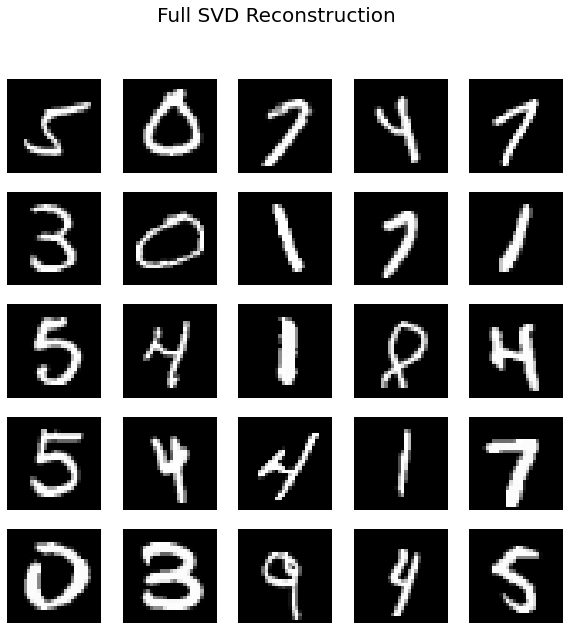

In [2]:
recons = np.empty_like(images)
for i in range(n_images):
    U,S,V = np.linalg.svd(images[i])
    D = np.diag(S)
    recon = np.dot(U, np.dot(D,V))
    recons[i] = np.clip(recon, 0, 255)

title = "Full SVD Reconstruction"
plot_images(recons, title=title, n_images=n_images)

## Reconstruction by Truncating the Singular Matrix to the Desired Rank

\begin{equation*}
\hat{\textbf{ A } }(k) = \textbf{U}\Sigma\textbf{V}^T
\end{equation*}

Note that in numpy, $\textbf{V}$ is already transposed. $\Sigma$ is truncated up to rank singular values.

In [27]:
rank = int(input("Enter rank: "))

In [28]:
assert(rank > 0)
print("%d-Rank Matrix Approximation:" % rank)

4-Rank Matrix Approximation:


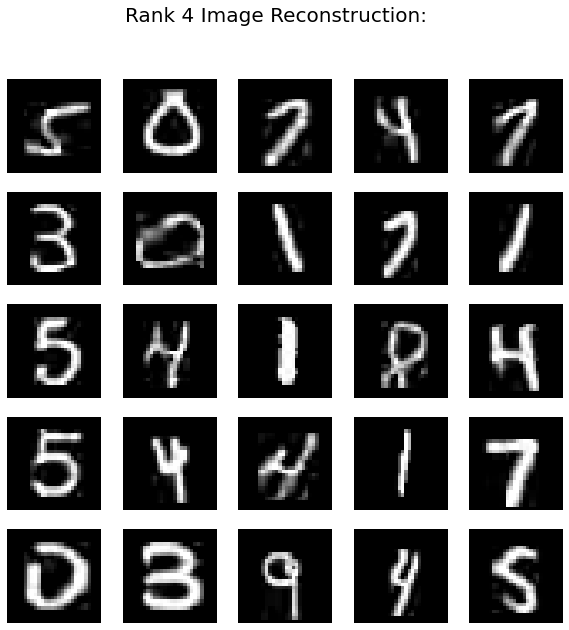

In [29]:
recons = np.empty_like(images)
for i in range(n_images):
    U,S,V = np.linalg.svd(images[i])
    S[rank:] = 0
    D = np.diag(S)
    recon = np.dot(U, np.dot(D,V))
    recons[i] = np.clip(recon, 0, 255)
    
title = "Rank %d Image Reconstruction:" % rank
plot_images(recons, title=title, n_images=n_images)

## Reconstruction by Summing Rank 1 Matrices

Unlike the previous reconstruction, this example computes the contribution of each singular value and reconstruct the image using:

\begin{equation*}
\hat{\textbf{ A } }(k) = \sum_{i=1}^{k} {\sigma_i}\textbf{u}_i\textbf{v}_i^T
\end{equation*}

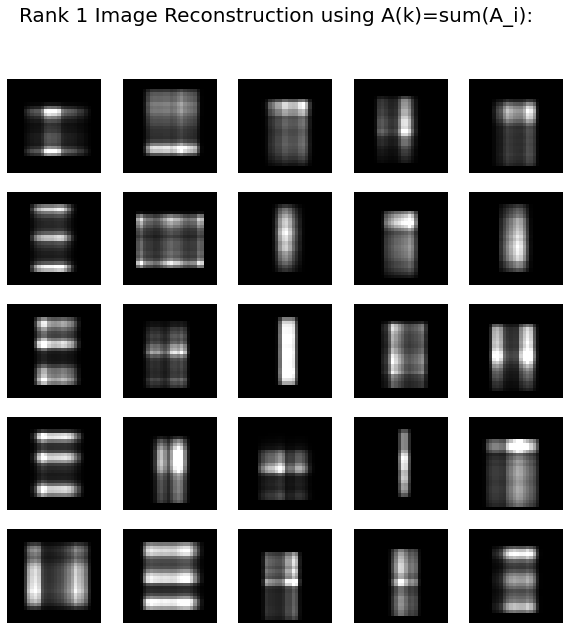

In [6]:
recons = np.empty_like(images)
for i in range(n_images):
    U,S,V = np.linalg.svd(images[i])
    recon = np.zeros_like(images[i], dtype=np.float64)
    for j in range(rank):
        u = np.reshape(U[:,j], (-1,1))
        v = np.reshape(V[j,:], (-1,1))
        s = S[j]
        part_recon = s*np.dot(u,v.T)
        recon += part_recon

    recons[i] = np.clip(recon, 0, 255)
    
title = "Rank %d Image Reconstruction using A(k)=sum(A_i):" % rank
plot_images(recons, title=title, n_images=n_images)